In [1]:
import numpy as np
import pandas as pd

In [13]:
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # для отрисовки 3D проекции

matplotlib.rc("font", size=18) # для увеличения шрифта подписей графиков

In [14]:
# загружаем данные
phones = pd.read_csv("data/1.8_phones.csv")

In [15]:
phones.head(17)

,disk,os,price,year
0,64,Android,7256,2016
1,128,Android,7623,2015
2,64,Android,1916,2010
3,512,iOS,15045,2017
4,16,Android,4478,2013
5,512,iOS,15842,2018
6,128,Android,7191,2015
7,64,Android,4277,2013
8,512,iOS,12797,2015
9,64,Android,6256,2015


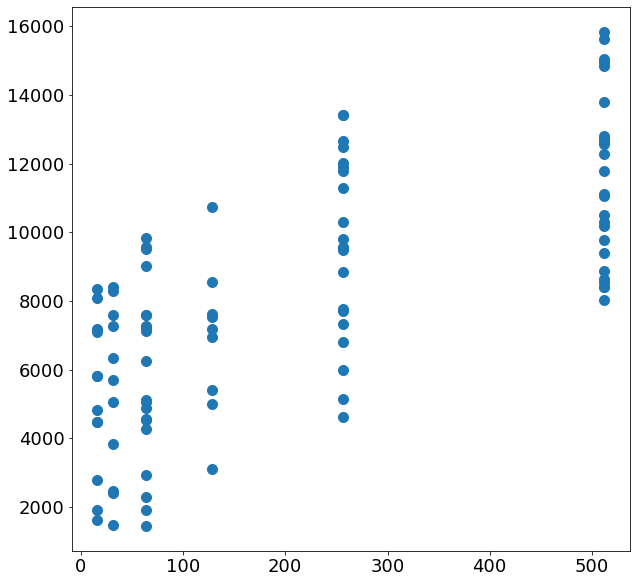

In [16]:
fig = plt.figure(figsize=(10, 10)) # создаем картинку
ax = plt.axes()

# помещаем точки на график
ax.scatter(phones["disk"], phones["price"], s=100)

# отображаем картинку
plt.show()

In [17]:
# импортируем модуль, отвечающий за линейную регрессию
from sklearn.linear_model import LinearRegression

In [18]:
# выгружаем признаки и целевые значения в отдельные переменные
X = phones[["disk"]]
y = phones["price"]

# создаем регрессор
reg = LinearRegression().fit(X, y)

In [19]:
# вытаскиваем нужные коэффициенты
[b] = reg.coef_
a = reg.intercept_

# создаем функцию для предсказания цены дома
def reg_prediction(disk):
    return a + b * disk

In [20]:
reg_prediction(X.disk[0])

6120.265447090668

In [21]:
# используем встроенные методы для расчета предсказаний
reg.predict(X[0:1])[0]

6120.265447090668

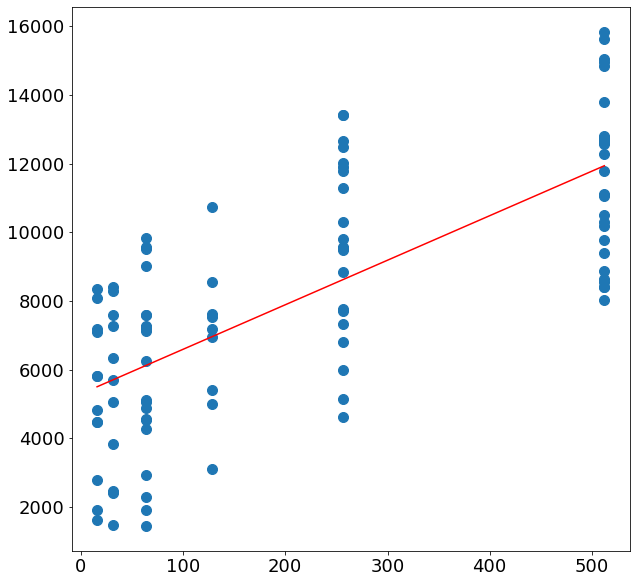

In [22]:
fig = plt.figure(figsize=(10, 10)) # создаем картинку
ax = plt.axes()

# помещаем точки на график
ax.scatter(phones["disk"], phones["price"], s=100)
# помещаем предсказания
ax.plot([X.disk.min(), X.disk.max()], [reg_prediction(X.disk.min()), reg_prediction(X.disk.max())], c="red")

# отображаем картинку
plt.show()

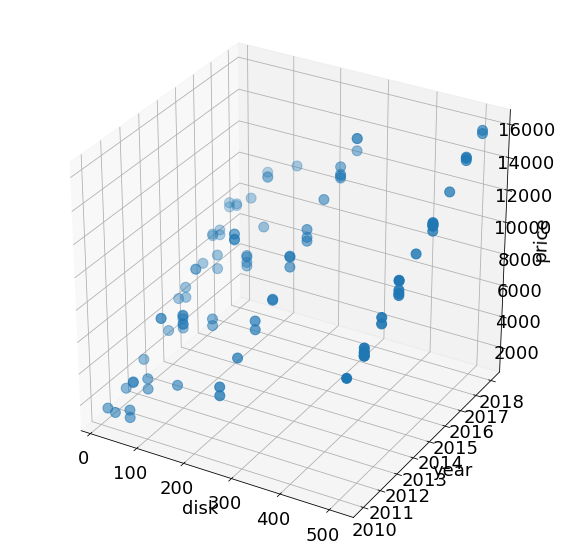

In [23]:
fig = plt.figure(figsize=(10, 10)) # создаем картинку
ax = plt.axes(projection="3d") # устанавливаем проекцию

# помещаем точки на график
ax.scatter(phones["disk"], phones["year"], phones["price"], s=100)

# называем оси
ax.set_xlabel("disk")
ax.set_ylabel("year")
ax.set_zlabel("price")

# отображаем картинку
plt.show()

In [24]:
# импортируем модуль, отвечающий за линейную регрессию
from sklearn.linear_model import LinearRegression

In [27]:
# выгружаем признаки и целевые значения в отдельные переменные
X = phones[["disk", "year"]]
y = phones["price"]

# создаем регрессор
reg = LinearRegression().fit(X, y)

In [ ]:
# price = price(dim_1, dim_2) = a + b1 * dim_1 + b2 * dim_2

In [31]:
# вытаскиваем нужные коэффициенты
[b1, b2] = reg.coef_
a = reg.intercept_

# создаем функцию для предсказания цены дома
def reg_prediction(dim_1, dim_2):
    return a + b1 * dim_1 + b2 * dim_2

In [32]:
reg_prediction(X.disk[0], X.year[0])

7848.046694419114

In [33]:
# используем встроенные методы для расчета предсказаний
reg.predict(X[0:1])[0]

7848.046694419114

In [35]:
# сделаем предсказания для различных конфигураций домов
d1, d2 = list(), list()
for x in np.linspace(min(phones["disk"]), max(phones["disk"]), 100):
    for y in np.linspace(min(phones["year"]), max(phones["year"]), 100):
        d1.append(x)
        d2.append(y)
d1 = np.array(d1).reshape(-1, 1)
d2 = np.array(d2).reshape(-1, 1)
p = reg.predict(np.concatenate([d1, d2], axis=1))

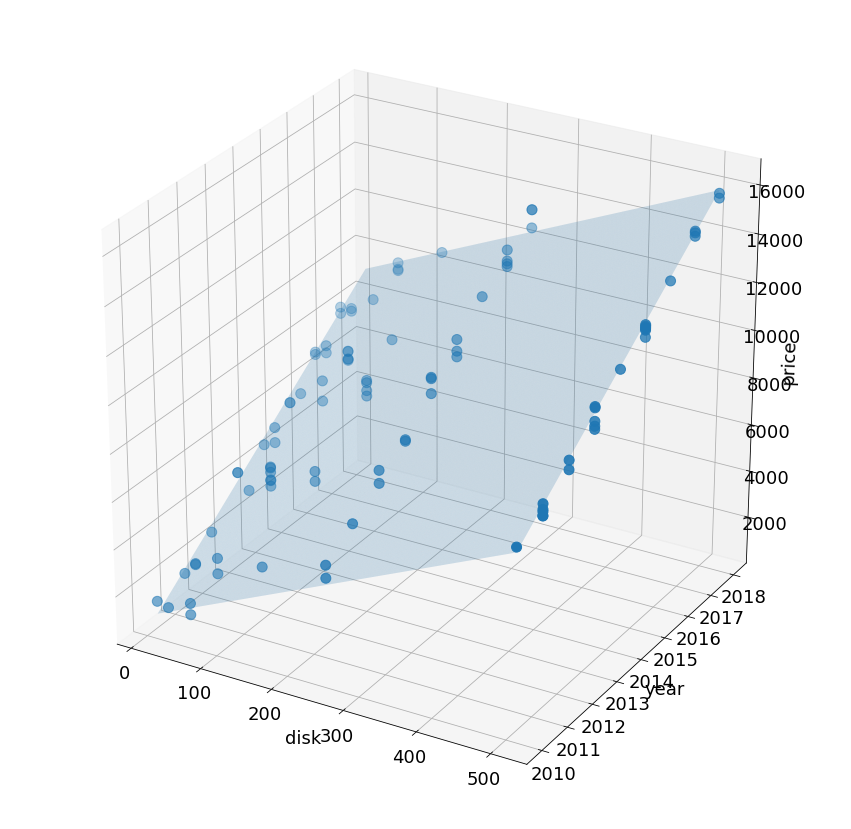

In [38]:
fig = plt.figure(figsize=(15, 15)) # создаем картинку
ax = plt.axes(projection="3d") # устанавливаем проекцию

# помещаем точки на график
ax.scatter(phones["disk"], phones["year"], phones["price"], s=100)

# помещаем предсказанные значения на график
ax.plot_trisurf(d1.ravel(), d2.ravel(), p.ravel(), alpha=0.2)


# называем оси
ax.set_xlabel("disk")
ax.set_ylabel("year")
ax.set_zlabel("price")


# изменяем позицию камеры и отрисовываем картинку
ax.elev = 27
plt.show()